In [1]:
import derm_ita
import os
from tqdm import tqdm
from PIL import Image
import pandas as pd
import random

path = "Data/images"
images = os.listdir(path)

# Testing:
# scores = {img_id: random.randint(1, 6) for img_id in img_ids}

scores = {}

for image in tqdm(images):
    if image == ".DS_Store":
        continue
    img = Image.open(path + "/" + image).convert("RGB")
    whole_image_ita = derm_ita.get_ita(image=img)
    scores[image] = derm_ita.get_fitzpatrick_type(whole_image_ita)



100%|██████████| 2299/2299 [05:31<00:00,  6.93it/s]


In [6]:
raw_df = pd.read_csv("data/metadata.csv")
df = raw_df.loc[:, ["img_id", "fitspatrick"]]
# df = df.dropna()

img_ids = df["img_id"].values
fitspatrick_metadata = df["fitspatrick"].values

metadata_scores = {img_ids[i]: fitspatrick_metadata[i] for i in range(len(img_ids))}


count = 0

for key in scores:
    if metadata_scores[key] == int(scores[key]):
        count += 1

n = len(df["fitspatrick"].dropna().values)

print(count / n)

0.2637215528781794


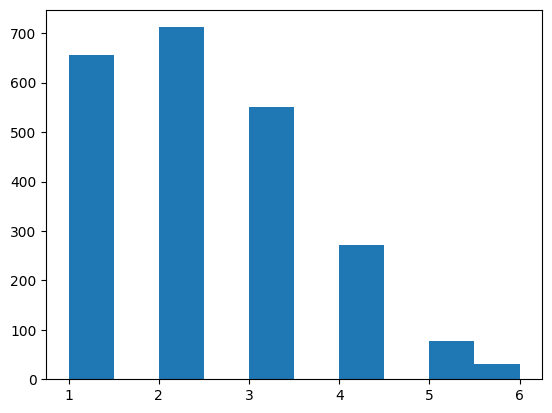

In [13]:
import matplotlib.pyplot as plt


s = [int(s) for s in scores.values()]
plt.hist(s)
plt.show()

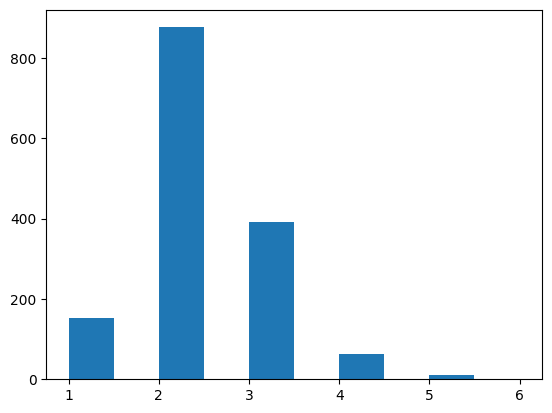

In [10]:
plt.hist(metadata_scores.values())
plt.show()